<a href="https://colab.research.google.com/github/feniltailor22/Time-Series-Analysis/blob/main/Forecasting_Monthly_Milk_Production_Using_Facebook_Fbprophet_with_Dickey_Fuller_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forecasting Timeseries Data Using Facebook FbProphet

1. Installating FbProphet
2. Data Preprocessing With Time Seires
3. Model Fitting
4. Obtaining The Forecasts
5. Plotting The Forecasts
6. Cross Validation
7. Computing Performance Metrics
8. Visualize the Performance MEtrics
9. Conclusions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet

In [ ]:
df= pd.read_csv('monthly-milk-production-pounds.csv')

In [ ]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [ ]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [ ]:
#dropping last row as it is a bad data
df.drop(168,axis=0, inplace=True)

In [ ]:
df.columns=['ds','y']

In [ ]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


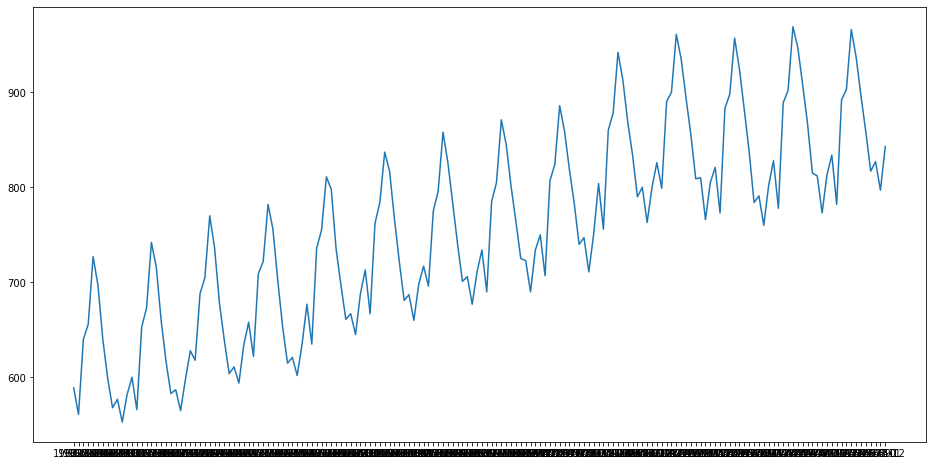

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['ds'],df['y'])

In [ ]:
#converting YYYY-MM formate to YYYY-MM-DD formate
df['ds']= pd.to_datetime(df['ds'])

In [ ]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


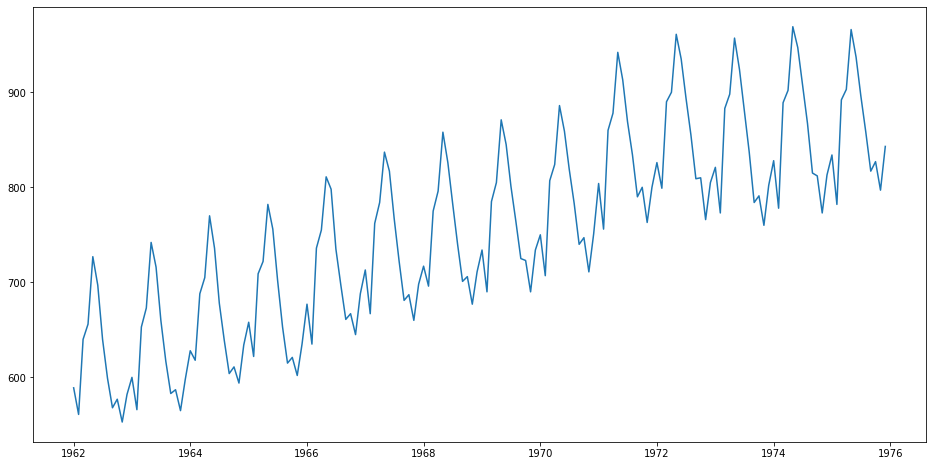

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['ds'],df['y'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf5bae23d0>]],
      dtype=object)

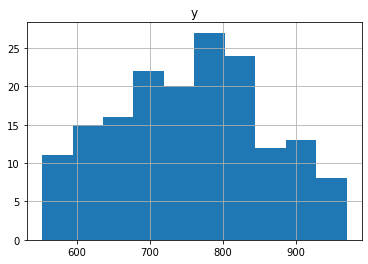

In [ ]:
df.hist()

###This is a seasonal data. We have to convert it into a stationary data.

###What is Seasonal Data?

In time series data, seasonality is the presence of variations that occur at specific regular intervals less than a year, such as weekly, monthly, or quarterly. Seasonality may be caused by various factors, such as weather, vacation, and holidays and consists of periodic, repetitive, and generally regular and predictable patterns in the levels of a time series.

In [ ]:
df_one= df[0:80]
df_two= df[80:168]

In [ ]:
df_one.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    680.275
dtype: float64

In [ ]:
df_two.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    822.375
dtype: float64

In [ ]:
df_one.var()

y    5599.568987
dtype: float64

In [ ]:
df_two.var()

y    5240.443966
dtype: float64

#**What is Augmented Dickey Fuller Test (ADF Test)?**

A Dickey-Fuller test is a unit root test that tests the null hypothesis that α=1 in the following model equation. alpha is the coefficient of the first lag on Y. Null Hypothesis (H0): alpha=1where,
\
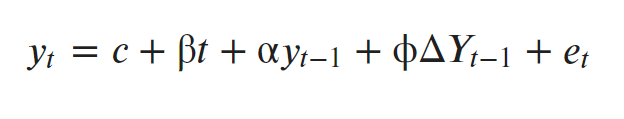

y(t-1) = lag 1 of time series
delta Y(t-1) = first difference of the series at time (t-1)
Fundamentally, it has a similar null hypothesis as the unit root test. That is, the coefficient of Y(t-1) is 1, implying the presence of a unit root. If not rejected, the series is taken to be non-stationary. The Augmented Dickey-Fuller test evolved based on the above equation and is one of the most common form of Unit Root test.

the ADF test is an ‘augmented’ version of the Dickey Fuller test. The ADF test expands the Dickey-Fuller test equation to include high order regressive process in the model.

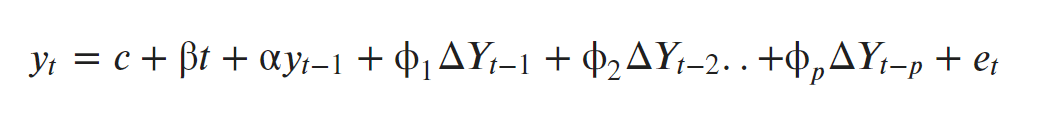

we have only added more differencing terms, while the rest of the equation remains the same. This adds more thoroughness to the test. The null hypothesis however is still the same as the Dickey Fuller test. A key point to remember here is: Since the null hypothesis assumes the presence of unit root, that is α=1, the p-value obtained should be less than the significance level (say 0.05) in order to reject the null hypothesis. Thereby, inferring that the series is stationary. However, this is a very common mistake analysts commit with this test. That is, if the p-value is less than significance level, people mistakenly take the series to be non-stationary.

####The statsmodel package provides a reliable implementation of the ADF test via the adfuller() function in statsmodels.tsa.stattools. It returns the following outputs:

1. The p-value
2. The value of the test statistic
3. Number of lags considered for the test
4. The critical value cutoffs.

####There are two ways to reject a null hypothesis in order to infer that the given time series is stationary.  

* The p-value obtained should be less than the significance level (say 0.05) in 
order to reject the null hypothesis. Thereby, inferring that the series is stationary.
* When the test statistic is lower than the critical value shown, you reject the null hypothesis and infer that the time series is stationary.

In [ ]:
#Augmented Dickey Fuller Test (ADF Test) 
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
adf_test= adfuller(df['y'])

In [ ]:
print(f'ADF Statistic: {adf_test[0]}')

ADF Statistic: -1.3038115874221299


In [ ]:
print(f'p-value: {adf_test[1]}')

p-value: 0.6274267086030314


In [ ]:
#The p-value is not less than the significance level (say 0.05) in order to reject the null hypothesis. Thereby, inferring that the series is non-stationary.

In [ ]:
#Making the data stationary by Shifting a value by One Step and substracting the output data with original df['y'] to get stationary data
df['y'].shift(1)

0        NaN
1      589.0
2      561.0
3      640.0
4      656.0
       ...  
163    896.0
164    858.0
165    817.0
166    827.0
167    797.0
Name: y, Length: 168, dtype: float64

In [ ]:
df['y']= df['y']-df['y'].shift(1)

In [ ]:
df['y']

0       NaN
1     -28.0
2      79.0
3      16.0
4      71.0
       ... 
163   -38.0
164   -41.0
165    10.0
166   -30.0
167    46.0
Name: y, Length: 168, dtype: float64

In [ ]:
df.drop(0,axis=0, inplace=True)

In [ ]:
df['y']

1     -28.0
2      79.0
3      16.0
4      71.0
5     -30.0
       ... 
163   -38.0
164   -41.0
165    10.0
166   -30.0
167    46.0
Name: y, Length: 167, dtype: float64

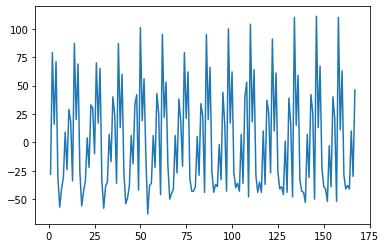

In [ ]:
df['y'].plot()

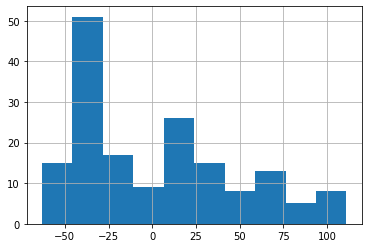

In [ ]:
df['y'].hist()

In [ ]:
df_new_one= df[0:40]
df_new_two= df[40:80]
df_new_three= df[80:120]
df_new_four= df[120:168]

In [ ]:
df_new_one.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    4.825
dtype: float64

In [ ]:
df_new_two.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y   -2.025
dtype: float64

In [ ]:
df_new_three.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    3.125
dtype: float64

In [ ]:
df_new_four.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    0.361702
dtype: float64

In [ ]:
df_new_one.var()

y    1926.250641
dtype: float64

In [ ]:
df_new_two.var()

y    1966.076282
dtype: float64

In [ ]:
df_new_three.var()

y    2073.496795
dtype: float64

In [ ]:
df_new_four.var()

y    2366.80111
dtype: float64

In [ ]:
adf_test= adfuller(df['y'])

In [ ]:
print(f'ADF Statistic: {adf_test[0]}')

ADF Statistic: -3.0549955586531126


In [ ]:
print(f'p-value: {adf_test[1]}')

p-value: 0.030068004001782136


In [ ]:
#The p-value is less than the significance level (say 0.05) in order to reject the null hypothesis. Thereby, inferring that the series is stationary.

In [ ]:
from fbprophet import Prophet

In [ ]:
#Checking in-built functions available in the prophet library
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [ ]:
#initializing the Model
model= Prophet()

In [ ]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0})])

In [ ]:
#Creating future dates of 365 days
future_dates= model.make_future_dataframe(periods=365)

In [ ]:
future_dates

,ds
0,1962-02-01
1,1962-03-01
2,1962-04-01
3,1962-05-01
4,1962-06-01
...,...
527,1976-11-26
528,1976-11-27
529,1976-11-28
530,1976-11-29


In [ ]:
#predictions
pred= model.predict(future_dates)

In [ ]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-02-01,2.042025,-48.019595,-28.549900,2.042025,2.042025,-40.255747,-40.255747,-40.255747,-40.255747,-40.255747,-40.255747,0.0,0.0,0.0,-38.213722
1,1962-03-01,2.040479,85.397180,104.433483,2.040479,2.040479,93.020043,93.020043,93.020043,93.020043,93.020043,93.020043,0.0,0.0,0.0,95.060522
2,1962-04-01,2.038768,6.935271,25.027097,2.038768,2.038768,14.325207,14.325207,14.325207,14.325207,14.325207,14.325207,0.0,0.0,0.0,16.363974
3,1962-05-01,2.037111,53.241367,72.343953,2.037111,2.037111,60.542390,60.542390,60.542390,60.542390,60.542390,60.542390,0.0,0.0,0.0,62.579502
4,1962-06-01,2.035399,-35.600524,-16.050912,2.035399,2.035399,-28.221297,-28.221297,-28.221297,-28.221297,-28.221297,-28.221297,0.0,0.0,0.0,-26.185897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,1976-11-26,1.452333,4.015377,22.546211,1.451246,1.453318,11.402595,11.402595,11.402595,11.402595,11.402595,11.402595,0.0,0.0,0.0,12.854927
528,1976-11-27,1.452214,8.950420,27.732475,1.451125,1.453204,16.849675,16.849675,16.849675,16.849675,16.849675,16.849675,0.0,0.0,0.0,18.301889
529,1976-11-28,1.452096,14.487646,33.345186,1.451004,1.453091,22.429655,22.429655,22.429655,22.429655,22.429655,22.429655,0.0,0.0,0.0,23.881751
530,1976-11-29,1.451978,19.640496,39.132769,1.450883,1.452977,28.030016,28.030016,28.030016,28.030016,28.030016,28.030016,0.0,0.0,0.0,29.481994


###Plotting the Forecasts

Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset. Light Blue color lines indicate trends.

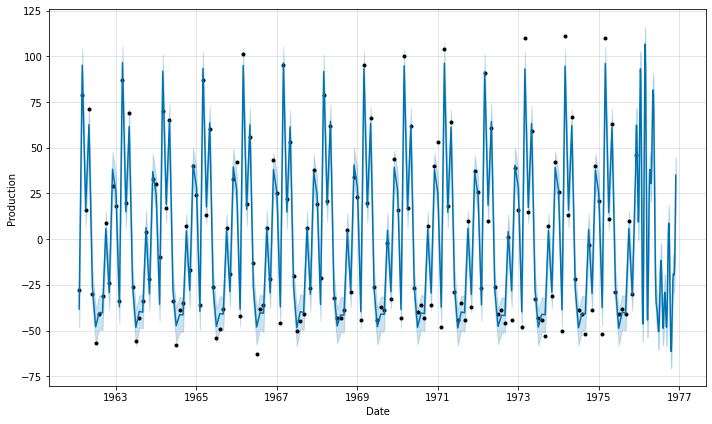

In [ ]:
figure1 = model.plot(pred, xlabel='Date', ylabel='Production')

In [ ]:
#Visualizing Each Components[Trends,Yearly]

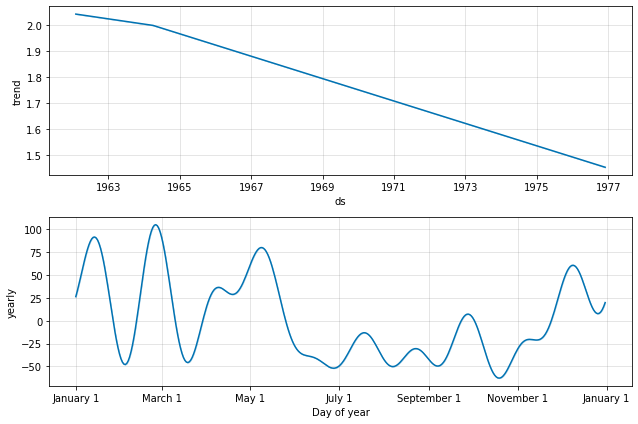

In [ ]:
figure2= model.plot_components(fcst=pred)
#fcst=output_value

###Cross Validation

Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut-off points in the history of the data and fit the model with data upto that cut-off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

1. horizon the forecast horizon
2. initial the size of the initial training period
3. period the spacing between cutoff dates

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv= cross_validation(model, horizon='365 days', period='180 days', initial='1095 days')
#It Computes forecasts from historical cutoff points, which user can input.
#If not provided, begins from (end - horizon) and works backwards, making cutoffs with a spacing of period until initial is reached.

#model: Prophet class object. 
#horizon: string with pd.Timedelta compatible style, e.g., '5 days','3 hours', '10 seconds'. (here, last 365 days i.e. forecasted)
#period: string with pd.Timedelta compatible style. Simulated forecast will be done at every this period. If not provided, 0.5 * horizon is used.(365*0.5= 180)
#initial: string with pd.Timedelta compatible style. The first training period will include at least this much data. If not provided, 3 * horizon is used.(3*365= 1095)

INFO:fbprophet:Making 20 forecasts with cutoffs between 1965-07-21 00:00:00 and 1974-12-01 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-08-01,-40.898372,-46.477276,-35.330595,-49.0,1965-07-21
1,1965-09-01,-34.869323,-40.116904,-29.147852,-38.0,1965-07-21
2,1965-10-01,6.103171,0.686216,11.524371,6.0,1965-07-21
3,1965-11-01,-20.281526,-25.918633,-14.274585,-19.0,1965-07-21
4,1965-12-01,36.035431,30.931851,41.950697,33.0,1965-07-21


###Obtaining the Performance Metrics

We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [ ]:
#Obtaining performance metrics
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_performance= performance_metrics(df= df_cv)

In [ ]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,123.770852,11.125235,9.160739,0.263184,0.196639,0.416667
1,42 days,115.513644,10.747727,8.600056,0.233072,0.185216,0.500000
2,43 days,123.586976,11.116968,8.837566,0.226524,0.185216,0.500000
3,46 days,89.586428,9.465011,7.889120,0.213582,0.185216,0.541667
4,47 days,87.148284,9.335325,7.677113,0.209829,0.171733,0.562500
...,...,...,...,...,...,...,...
175,357 days,31.629871,5.624044,4.693559,0.132684,0.106889,0.791667
176,360 days,34.612260,5.883218,4.924323,0.144501,0.106889,0.750000
177,361 days,37.014617,6.083964,5.085869,0.148150,0.106889,0.708333
178,362 days,35.950367,5.995863,4.947491,0.146052,0.106889,0.708333


In [ ]:
from fbprophet.plot import plot_cross_validation_metric

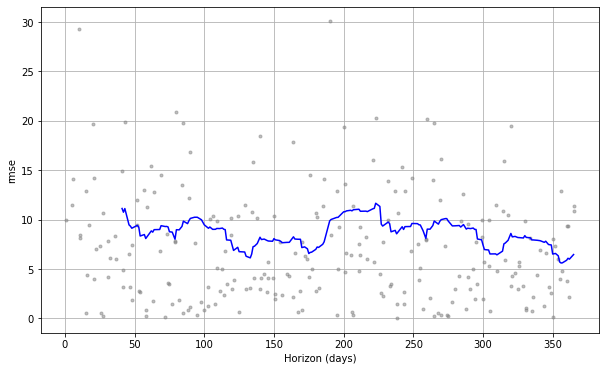

In [ ]:
fig= plot_cross_validation_metric(df_cv, metric='rmse')